In [47]:
from bs4 import BeautifulSoup
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf 
import helper_functions as hf
from constants import CURRENT_YR, GENERATED_DIR
%reload_ext autoreload
%autoreload 2

In [44]:
%aimport helper_functions

In [28]:
def scrape_public_bracket(yr) -> pd.DataFrame:
    link = 'https://fantasy.espn.com/tournament-challenge-bracket/'+str(yr)+'/en/whopickedwhom'
    with urllib.request.urlopen(link) as url:
        page = url.read()
    soup = BeautifulSoup(page, "html.parser")
    wpw_table = soup.find('table', {'class':'wpw-table'})
    cols = ['yr', 'school', 'pct']
    team_pcts = pd.DataFrame(columns=cols)
    trs = wpw_table.find_all('tr')
    for tr in trs[1:]:
        tds = tr.find_all('td')
        for td in tds:
            school = td.find('span', {'class':'teamName'}).text.lower()
            pct = float(td.find('span', {'class':'percentage'}).text.rstrip('%'))
            new_row = pd.DataFrame(columns=cols)
            new_row.loc[0] = [yr, school, pct]
            team_pcts = pd.concat([team_pcts, new_row], ignore_index=True)
    q = '''
    SELECT
        yr,
        school, 
        pct AS pct_win_rd,
        ROW_NUMBER() OVER(PARTITION BY school ORDER BY pct DESC) rd
    FROM team_pcts
    '''
    team_pct_by_rd = sqldf(q)
    return(team_pct_by_rd)

In [29]:
cols = ['yr', 'school', 'pct_win_rd', 'rd']
public_bracket_df = pd.DataFrame(columns=cols)
for yr in [2021, CURRENT_YR]:
    public_bracket_df = pd.concat([public_bracket_df, scrape_public_bracket(yr)])

In [30]:
public_bracket_df

,yr,school,pct_win_rd,rd
0,2021,alabama,96.9,1
1,2021,alabama,88.0,2
2,2021,alabama,75.1,3
3,2021,alabama,53.7,4
4,2021,alabama,36.6,5
...,...,...,...,...
379,2023,xavier,61.2,2
380,2023,xavier,20.9,3
381,2023,xavier,7.7,4
382,2023,xavier,2.4,5


In [45]:
joined_df = hf.scraped_df_join_to_team_spellings(public_bracket_df, 'school')
joined_df

,TeamID,yr,school,pct_win_rd,rd
0,1104,2021,alabama,96.9,1
1,1104,2021,alabama,88.0,2
2,1104,2021,alabama,75.1,3
3,1104,2021,alabama,53.7,4
4,1104,2021,alabama,36.6,5
...,...,...,...,...,...
715,1274,2023,miami,33.8,2
716,1274,2023,miami,9.3,3
717,1274,2023,miami,3.6,4
718,1274,2023,miami,1.2,5


In [46]:
check_for_missing_spellings(public_bracket_df, joined_df, 'school')

array(['asu/nev', 'fau', 'kennesaw st', 'txso/fdu'], dtype=object)

In [48]:
joined_df.to_csv(f'{GENERATED_DIR}/espn_who_picked_whom.csv')

In [82]:
heatmap_arr

array([[  1.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  2.,   4.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  3.,   6.,   9.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  4.,   8.,  12.,  16.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  5.,  10.,  15.,  20.,  25.,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  6.,  12.,  18.,  24.,  30.,  36.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  nan,  nan,
         nan,  nan,  n

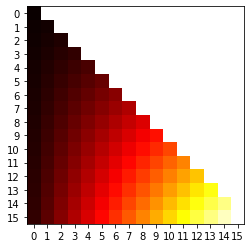

In [83]:
plt.imshow(heatmap_arr, cmap='hot', interpolation='nearest')
plt.yticks(range(16))
plt.xticks(range(16))
plt.show()

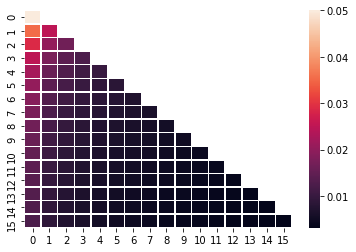

In [88]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(0.05/np.sqrt(heatmap_arr), linewidth=0.5)
plt.show()

In [8]:
trs = wpw_table.find_all('tr')

In [10]:
tds = trs[1].find_all('td')

In [15]:
tds[0].find('span', {'class':'teamName'}).text

'Arizona'

In [16]:
tds[0].find('span', {'class':'percentage'}).text

'97.0%'